**Introduction**

In an era characterized by an increasing focus on preventive healthcare, understanding the factors that contribute to heart attacks and developing effective prediction models has gained paramount importance. This dataset aims to provide researchers, healthcare professionals, and data enthusiasts with a comprehensive collection of features to facilitate in-depth analysis and prediction of heart attacks.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from  io import StringIO
import pydotplus
from sklearn import tree

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("/Users/harshavardhan/Documents/Heart-Attack-Analysis-and-Prediction-main/Dataset/heart.csv")

In [4]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

**Describe Dataset:**

**Age :** 
This is a key risk factor for heart disease. As age increases, the risk of damaged and narrowed arteries, weakened or thickened heart muscle, and other heart disease risk factors also increases.

**Sex :** 
Men are generally at higher risk of heart disease than women. However, after menopause, a woman's risk increases to almost match that of a man's.

**Chest Pain Type (cp) :** 
Chest pain is a key symptom of heart disease. It may manifest in different forms: typical angina, atypical angina, non-anginal pain, or may even be asymptomatic. Chest pain associated with heart disease is usually described as a discomfort, heaviness, pressure, aching, burning, fullness, squeezing, or painful feeling.

**Resting Blood Pressure (trtbps) :** 
High blood pressure (hypertension) can harden and thicken arteries, leading to a buildup of plaque (atherosclerosis) that can cause coronary artery disease. The pressure is measured in millimeters of mercury (mm Hg) and is usually recorded as two figures. Normal resting blood pressure in an adult is approximately 120/80 mm Hg.

**Serum Cholesterol (chol) :** 
Cholesterol is a type of lipid molecule. High levels of low-density lipoprotein (LDL) or 'bad cholesterol' can increase the risk of heart disease by forming plaques and narrowing arteries.

**Fasting Blood Sugar (fbs) :** 
High fasting blood sugar levels (prediabetes or diabetes) can contribute to narrowing of the arteries and increase the risk of heart disease. A fasting blood sugar level less than 100 mg/dL is considered normal. 100-125 mg/dL is considered prediabetes, and 126 mg/dL or higher on two separate tests means you have diabetes.

**Resting Electrocardiographic Results (restecg) :** 
ECG records the electrical activity of the heart and can show previous heart attacks or problems with the heart rhythm. Abnormal results can indicate heart conditions such as left ventricular hypertrophy or heart arrhythmias.

**Maximum Heart Rate Achieved (thalachh) :** 
During exercise or stress testing, the maximum heart rate can indicate cardiovascular fitness and the heart's ability to handle exertion.

**Exercise Induced Angina (exang) :** 
This happens when the heart muscle doesn't get as much blood (and thus oxygen) as it needs for the level of physical activity, causing chest pain or discomfort.

**ST Depression Induced by Exercise Relative to Rest (oldpeak) :** 
Changes in the ST segment on an ECG can indicate heart disease. ST depression can indicate ischemia, or lack of sufficient blood flow to the heart muscle.

**The Slope of The Peak Exercise ST Segment (slp) :** 
The ST segment/heart rate slope (ST/HR slope), has been introduced as an index of relative myocardial oxygen demand during exercise. The shape of the ST segment can reveal a lot about the heart's condition.

**Number of Major Vessels Colored by Flourosopy (caa) :** 
This measures the presence of disease in the major blood vessels to the heart. A higher number usually indicates more severe disease.

**Thallium Stress Test (thall) :** 
This is a nuclear imaging method that shows how well blood flows into the heart muscle, both at rest and during activity. It can reveal areas of the heart muscle that aren't receiving enough blood, indicating coronary artery disease.

**Output (Diagnosis of Heart Disease) :** 
This is the target variable. A value of 0 indicates less than 50% diameter narrowing - not a significant heart disease, while a value of 1 indicates more than 50% diameter narrowing - a significant heart disease.

In [5]:
df.shape

(303, 14)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"{column} : {unique_values}")

age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


In [9]:
df['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [10]:
df['thall'] = df['thall'].replace(0,2)

**Some columns to be mapped for better plots**

In [11]:
sex_mapping = {1: 'male', 0: 'female'}
sex = df['sex'].map(sex_mapping)

thall_mapping = {1: 'fixed defect', 2: 'normal', 3: 'reversible defect'}
stress_test_mapp = df['thall'].map(thall_mapping)

slp_mapping = {0: 'unsloping', 1: 'flat', 2: 'downsloping'}
slope_of_peak_exercise = df['slp'].map(slp_mapping)

cp_mapping = {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'}
chest_pain_type = df['cp'].map(cp_mapping)

**Lets start analysis**

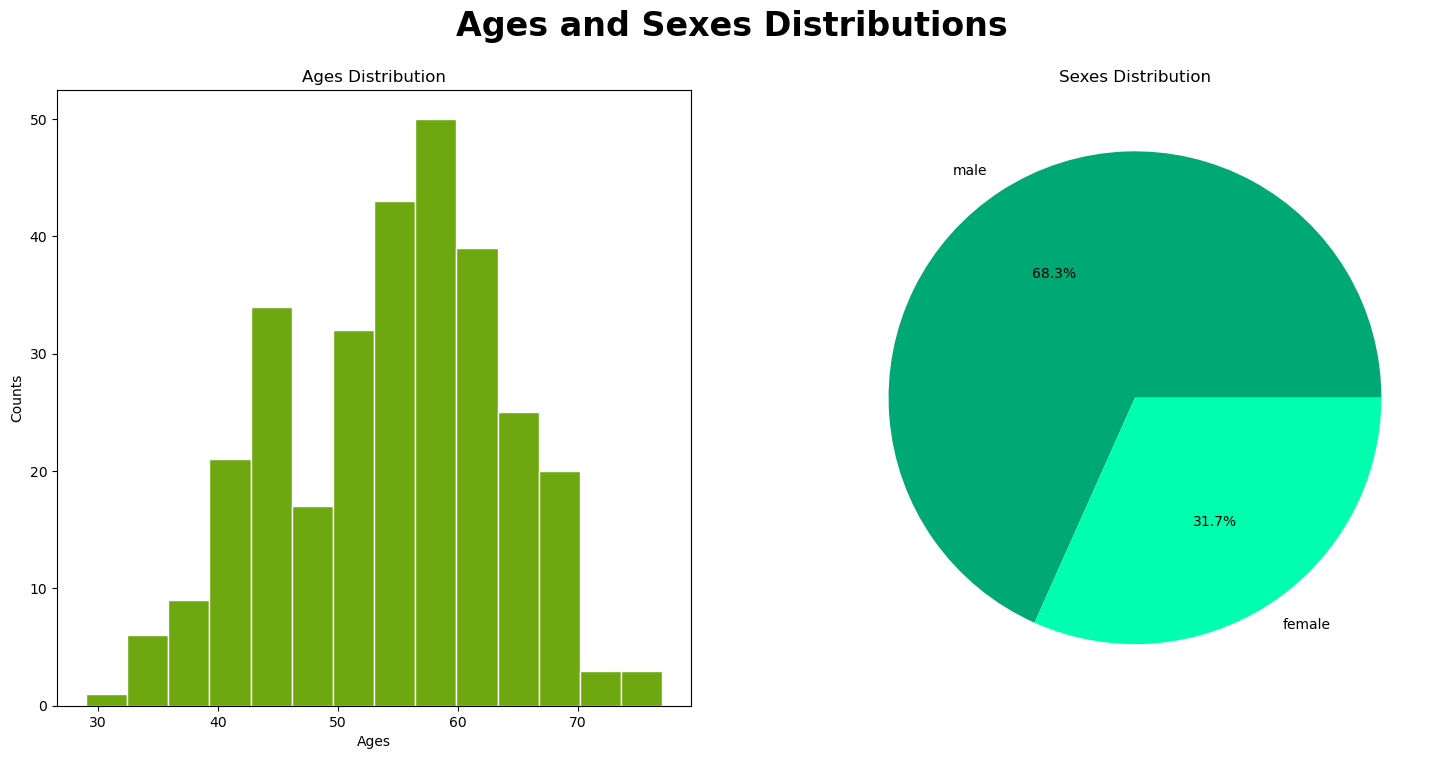

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))

fig.suptitle("Ages and Sexes Distributions",fontweight='bold', fontsize=24)

ax1.hist(df['age'], bins=14, color='#6EA811', ec='white')
ax1.set(xlabel='Ages', ylabel='Counts', title='Ages Distribution')

ax2.pie(sex.value_counts(), labels=sex.value_counts().index, autopct='%1.1f%%', colors=['#00A873', '#00FEAF'])
ax2.set(title='Sexes Distribution');

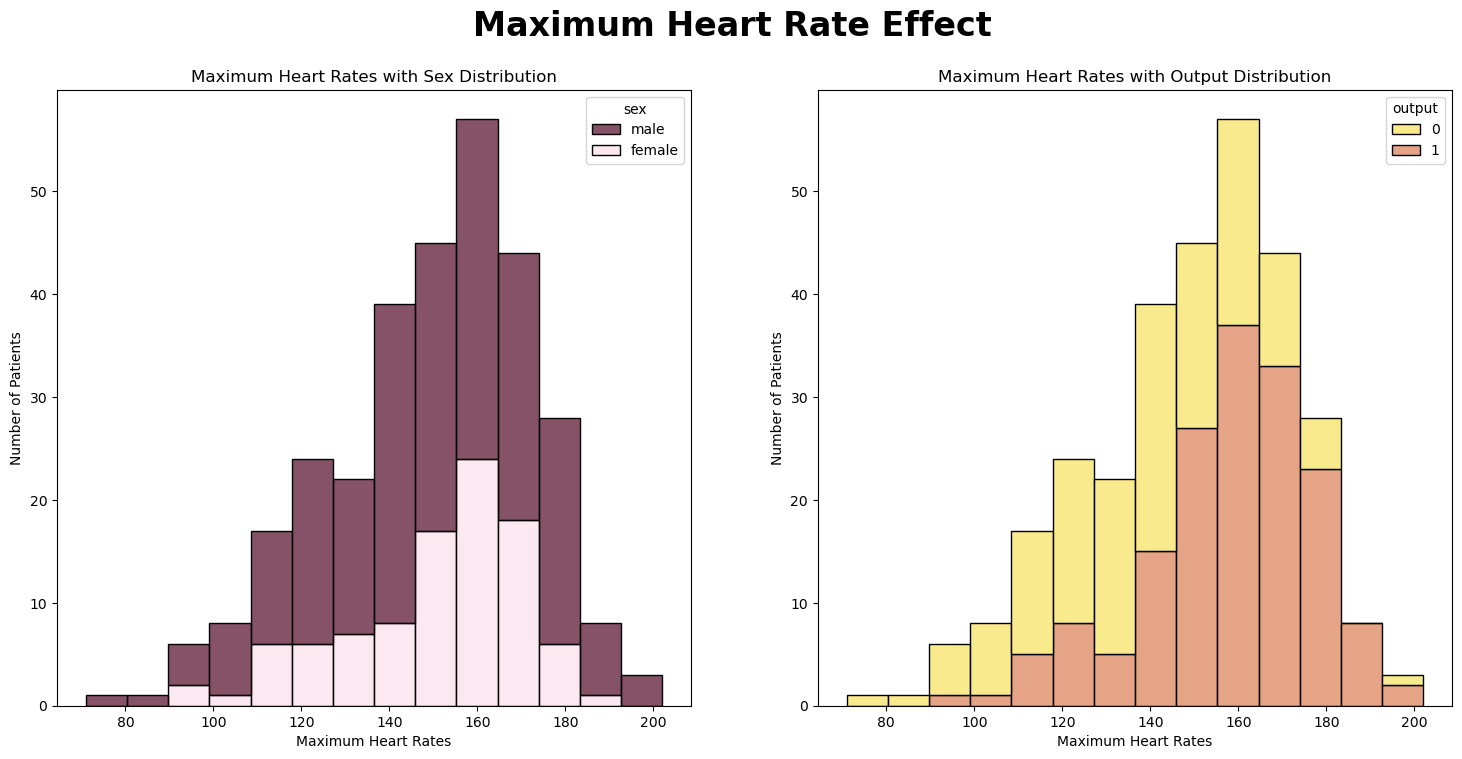

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))

fig.suptitle("Maximum Heart Rate Effect",fontweight='bold', fontsize=24)

sns.histplot(x='thalachh', hue=sex, data=df, ax=axs[0], palette=['#5C1835','#FAE1EC'], multiple="stack", stat="count")
axs[0].set(title='Maximum Heart Rates with Sex Distribution')
axs[0].set_xlabel('Maximum Heart Rates')
axs[0].set_ylabel('Number of Patients')

sns.histplot(x='thalachh', hue='output', data=df, multiple="stack", stat="count", ax=axs[1], palette=['#F9E469', '#DB865C'])
axs[1].set(title='Maximum Heart Rates with Output Distribution')
axs[1].set_ylabel('Number of Patients')
axs[1].set_xlabel('Maximum Heart Rates');

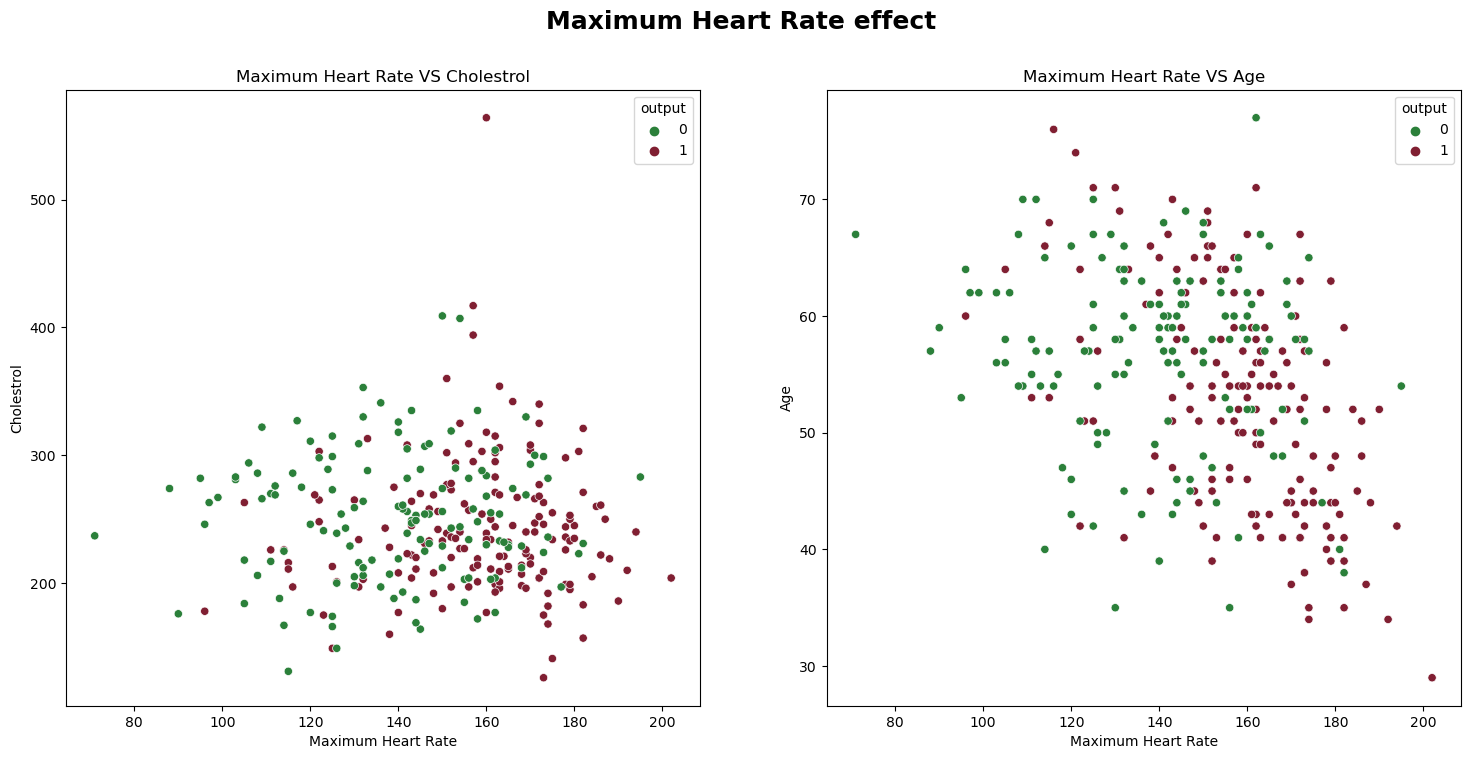

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))

colors = ['#2B803A', '#801F32']
fig.suptitle('Maximum Heart Rate effect', fontweight='bold', fontsize=18)

sns.scatterplot(x='thalachh', y='chol', data=df, ax=axs[0], hue='output', palette=colors)
axs[0].set(title='Maximum Heart Rate VS Cholestrol')
axs[0].set_ylabel('Cholestrol')
axs[0].set_xlabel('Maximum Heart Rate')

sns.scatterplot(x='thalachh', y='age', data=df, ax=axs[1], hue='output', palette=colors)
axs[1].set(title='Maximum Heart Rate VS Age')
axs[1].set_ylabel('Age')
axs[1].set_xlabel('Maximum Heart Rate');

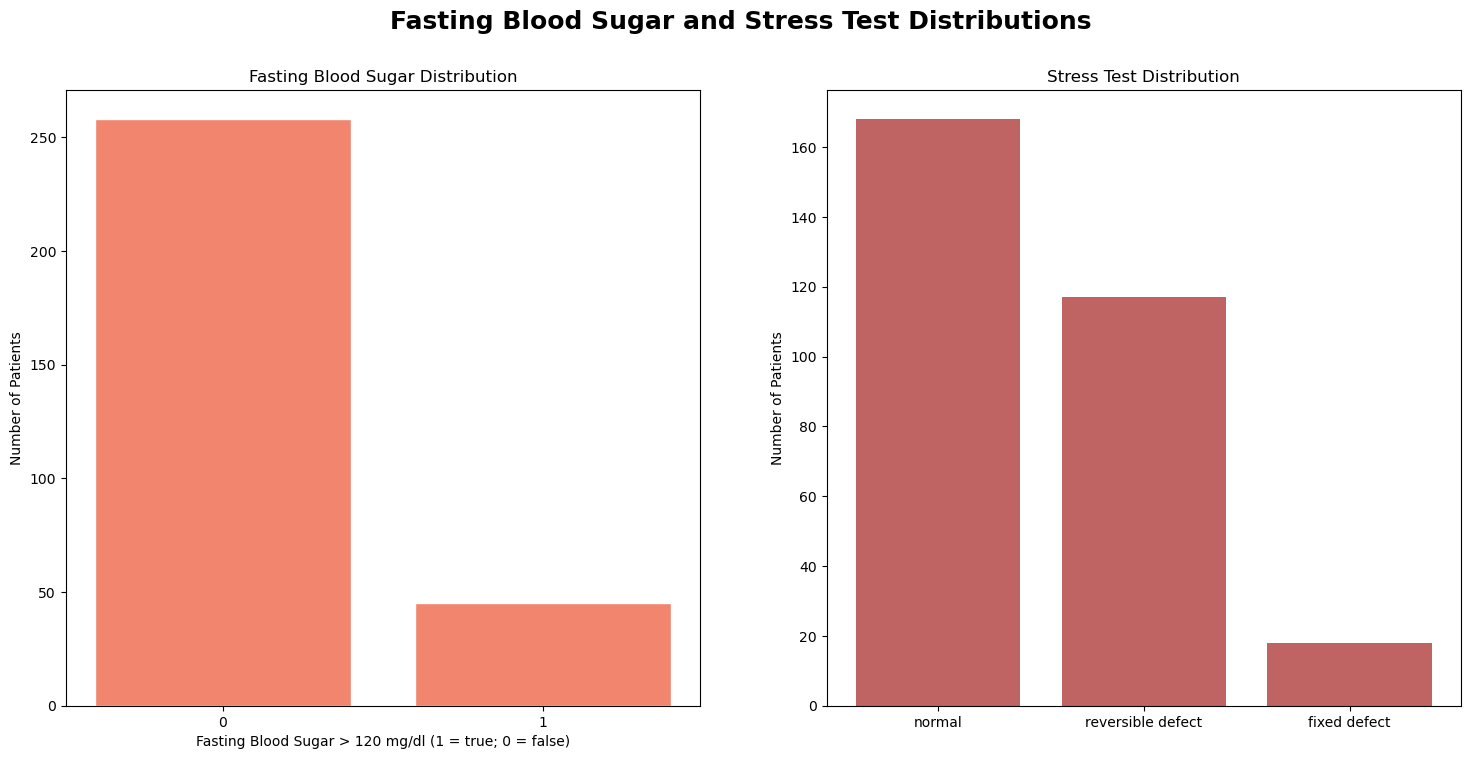

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))
fig.suptitle('Fasting Blood Sugar and Stress Test Distributions', fontweight='bold', fontsize=18)

axs[0].bar(df['fbs'].value_counts().index, df['fbs'].value_counts().values, color='#F2856D', ec='white')
axs[0].set(title='Fasting Blood Sugar Distribution')
axs[0].set_xlabel("Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)")
axs[0].set_ylabel("Number of Patients")
axs[0].set_xticks(df['fbs'].value_counts().index)


axs[1].bar(stress_test_mapp.value_counts().index, stress_test_mapp.value_counts().values, color='#BF6363')
axs[1].set(title="Stress Test Distribution")
axs[1].set_ylabel("Number of Patients");

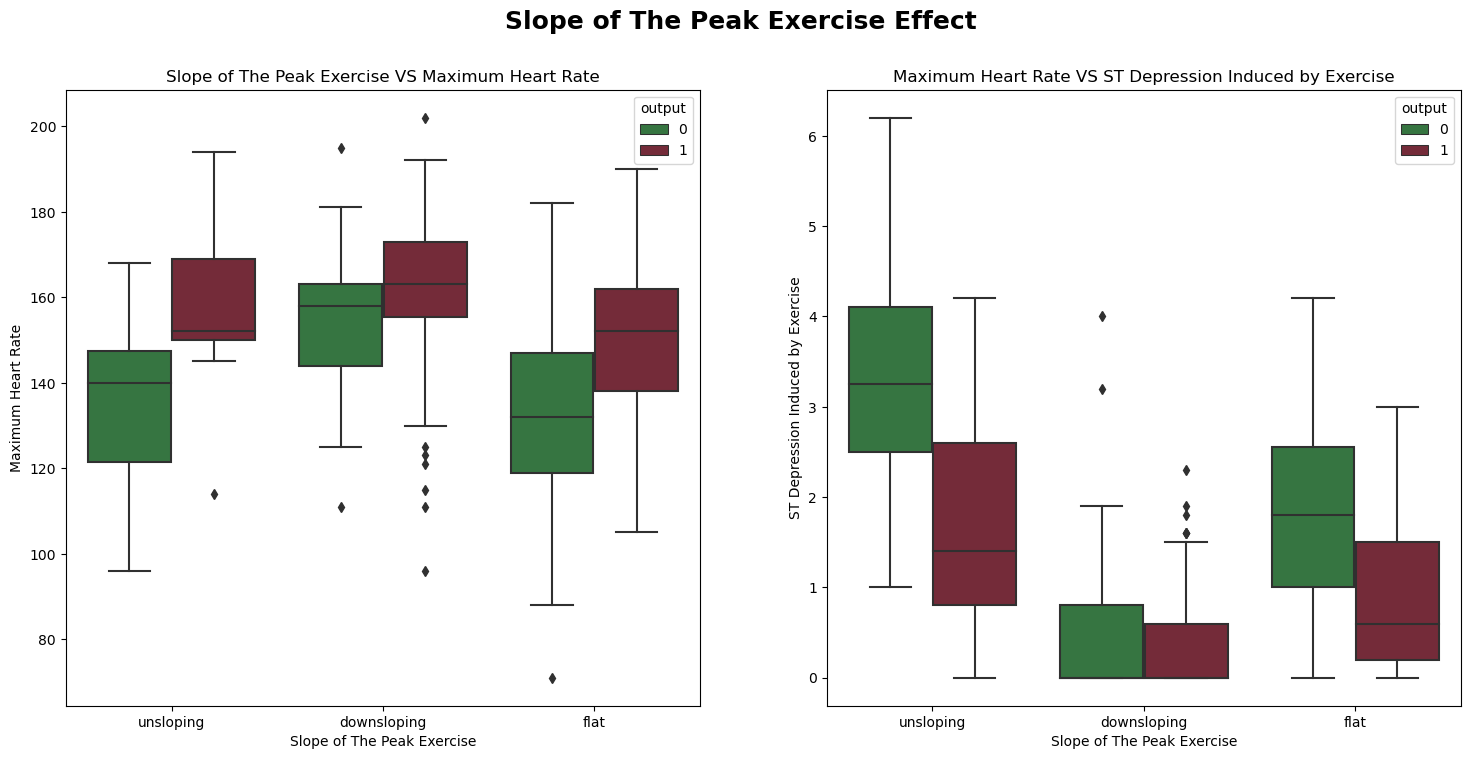

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))

colors = ['#2B803A', '#801F32']
fig.suptitle('Slope of The Peak Exercise Effect', fontweight='bold', fontsize=18)

sns.boxplot(x=slope_of_peak_exercise, y='thalachh', data=df, ax=axs[0], hue='output', palette=colors)
axs[0].set(title='Slope of The Peak Exercise VS Maximum Heart Rate')
axs[0].set_ylabel('Maximum Heart Rate')
axs[0].set_xlabel('Slope of The Peak Exercise')

sns.boxplot(x=slope_of_peak_exercise, y='oldpeak', data=df, ax=axs[1],hue='output', palette=colors)
axs[1].set(title='Maximum Heart Rate VS ST Depression Induced by Exercise')
axs[1].set_ylabel('ST Depression Induced by Exercise')
axs[1].set_xlabel('Slope of The Peak Exercise');

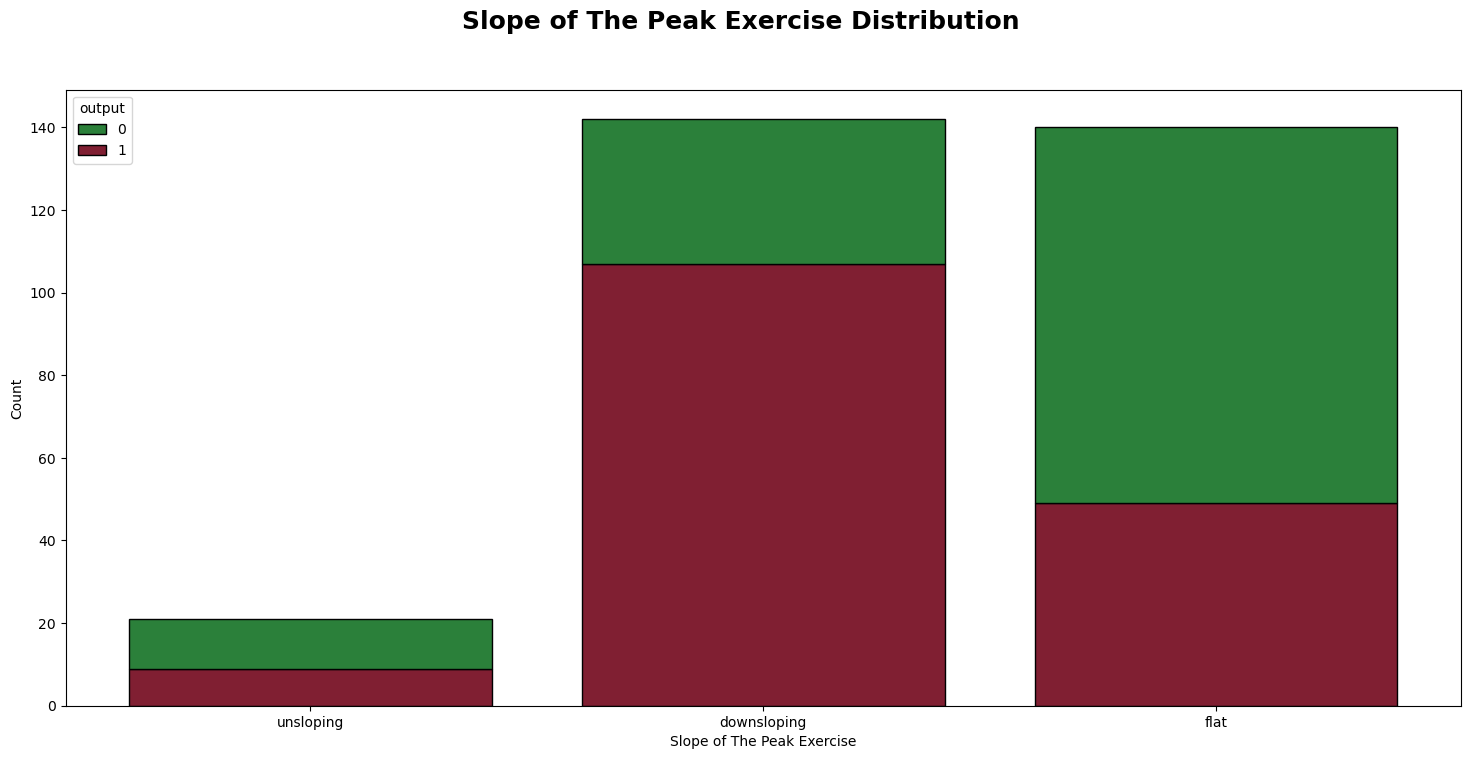

In [17]:
plt.subplots(ncols=1, figsize=(18,8))
plt.suptitle('Slope of The Peak Exercise Distribution', fontweight='bold', fontsize=18)
sns.histplot(x=slope_of_peak_exercise, hue=df['output'], palette=colors, multiple="stack", stat="count", alpha=1.0, shrink=0.8)
plt.xlabel('Slope of The Peak Exercise');

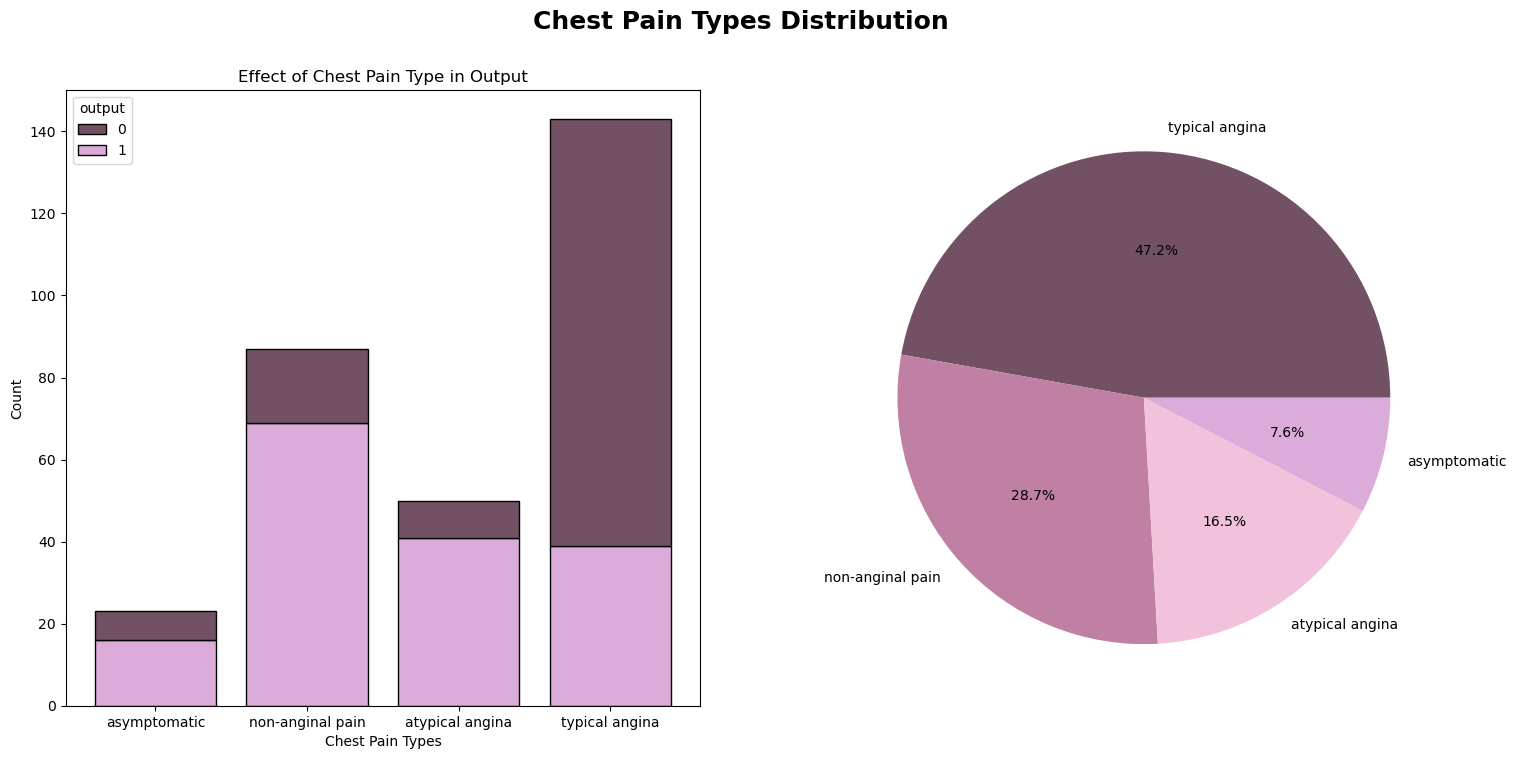

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))

colors = ['#735164', '#BF80A3','#F2C2DC','#DBABDA']
fig.suptitle('Chest Pain Types Distribution', fontweight='bold', fontsize=18)

sns.histplot(x=chest_pain_type, data=df, ax=axs[0], hue='output', palette=['#735164','#DBABDA'], multiple="stack", stat="count", alpha=1.0, shrink=0.8)
axs[0].set(title='Effect of Chest Pain Type in Output')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Chest Pain Types')

plt.pie(chest_pain_type.value_counts(), labels=chest_pain_type.value_counts().index, autopct='%1.1f%%', colors=colors);

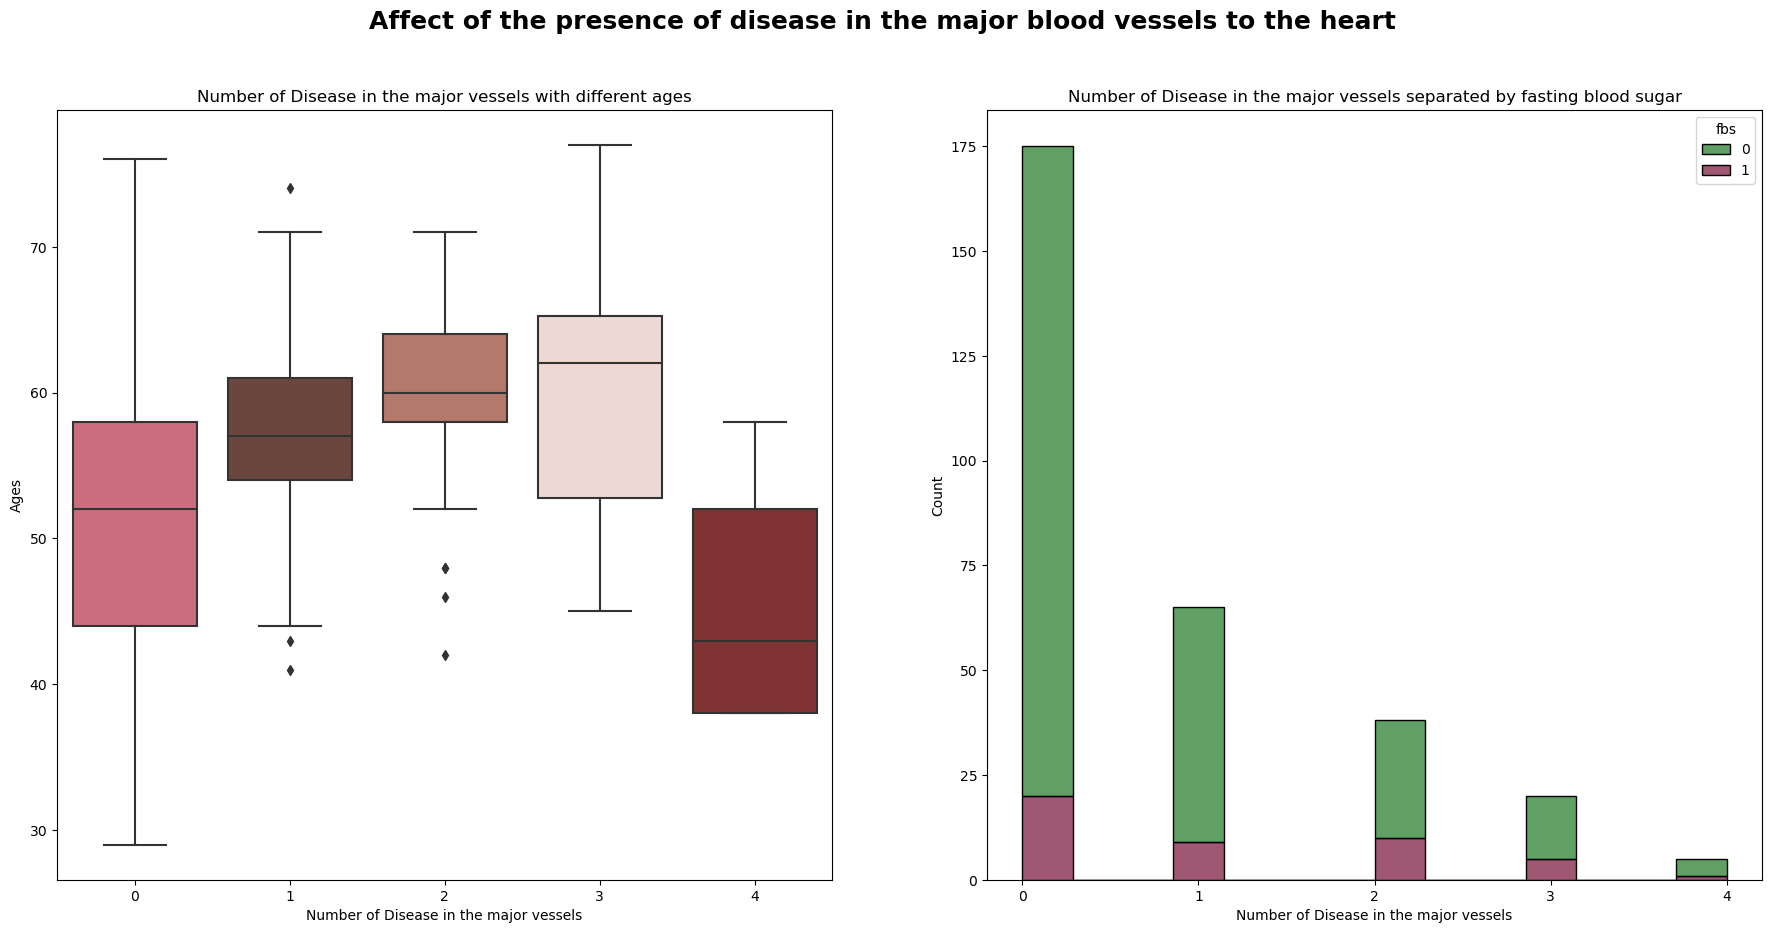

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(22,10))

colors = ['#D95F76', '#734136','#BF7160','#F2D5CE', '#8C2626']
fig.suptitle('Affect of the presence of disease in the major blood vessels to the heart', fontweight='bold', fontsize=18)

sns.boxplot(x='caa', y='age', data=df,ax=axs[0], palette=colors)
axs[0].set(title='Number of Disease in the major vessels with different ages')
axs[0].set_ylabel('Ages')
axs[0].set_xlabel('Number of Disease in the major vessels')

sns.histplot(x='caa', data=df, hue='fbs', ax=axs[1], palette=['#2B8032', '#801F41'], multiple="stack", stat="count")
axs[1].set(title='Number of Disease in the major vessels separated by fasting blood sugar')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Number of Disease in the major vessels')
axs[1].set(xticks=range(5));

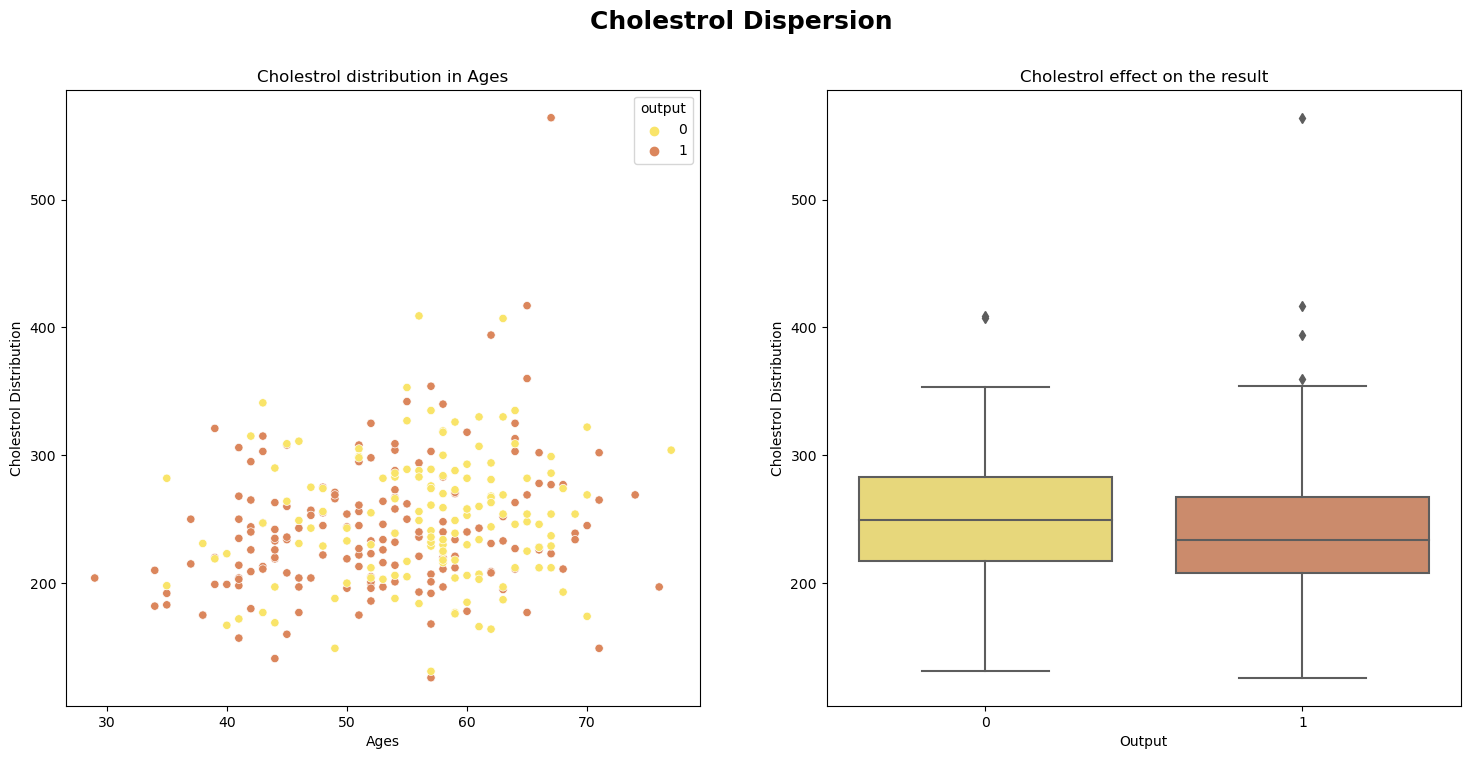

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))

colors = ['#F9E469', '#DB865C']
fig.suptitle('Cholestrol Dispersion', fontweight='bold', fontsize=18)

sns.scatterplot(x='age', y='chol', data=df, ax=axs[0], hue='output', palette=colors)
axs[0].set(title='Cholestrol distribution in Ages')
axs[0].set_ylabel('Cholestrol Distribution')
axs[0].set_xlabel('Ages')

sns.boxplot(x='output', y='chol', data=df, ax=axs[1], palette=colors)
axs[1].set(title='Cholestrol effect on the result')
axs[1].set_ylabel('Cholestrol Distribution')
axs[1].set_xlabel('Output');

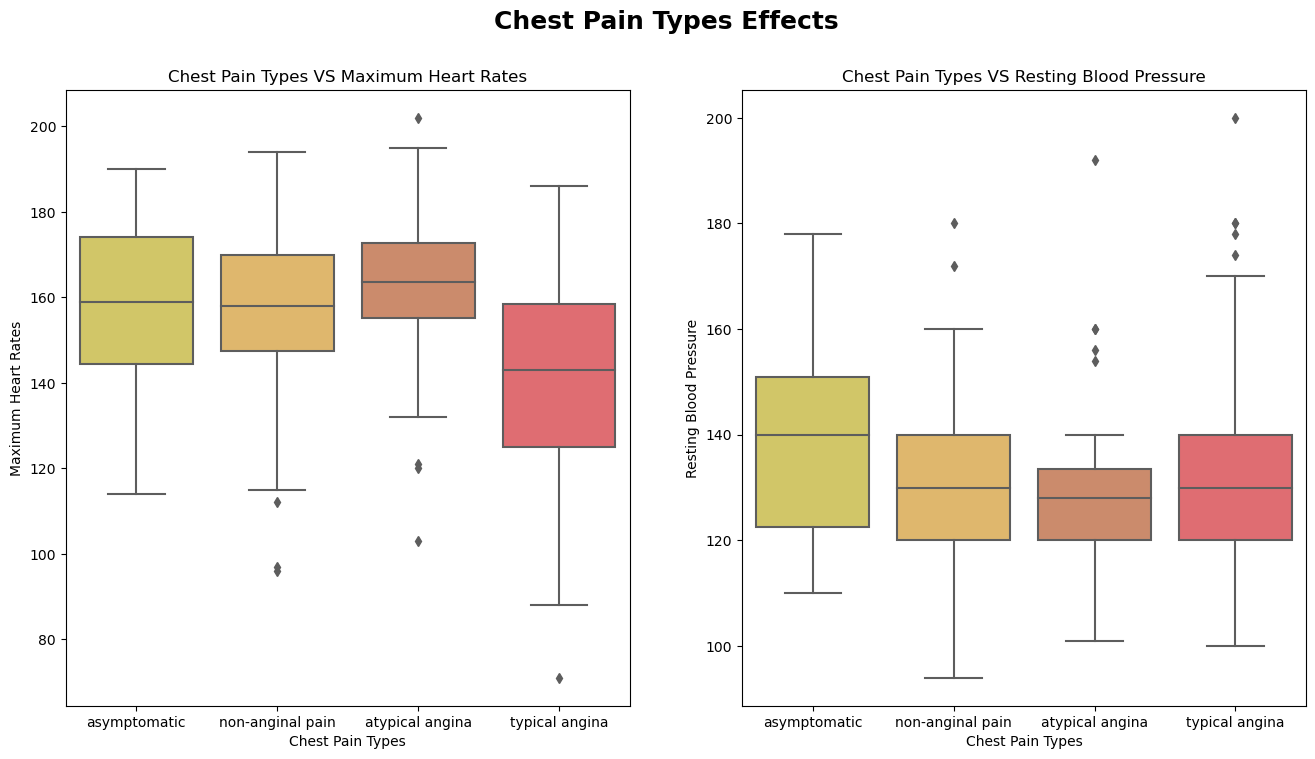

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))
fig.suptitle('Chest Pain Types Effects', fontweight='bold', fontsize=18)

colors = ['#E3D456', '#F2BD5A', '#DB865C', '#F25A61']

sns.boxplot(x=chest_pain_type, y=df['thalachh'],ax=axs[0], palette=colors)
axs[0].set(title='Chest Pain Types VS Maximum Heart Rates')
axs[0].set_ylabel('Maximum Heart Rates')
axs[0].set_xlabel('Chest Pain Types')

sns.boxplot(x=chest_pain_type, y=df['trtbps'],ax=axs[1], palette=colors)
axs[1].set(title='Chest Pain Types VS Resting Blood Pressure')
axs[1].set_ylabel('Resting Blood Pressure')
axs[1].set_xlabel('Chest Pain Types');

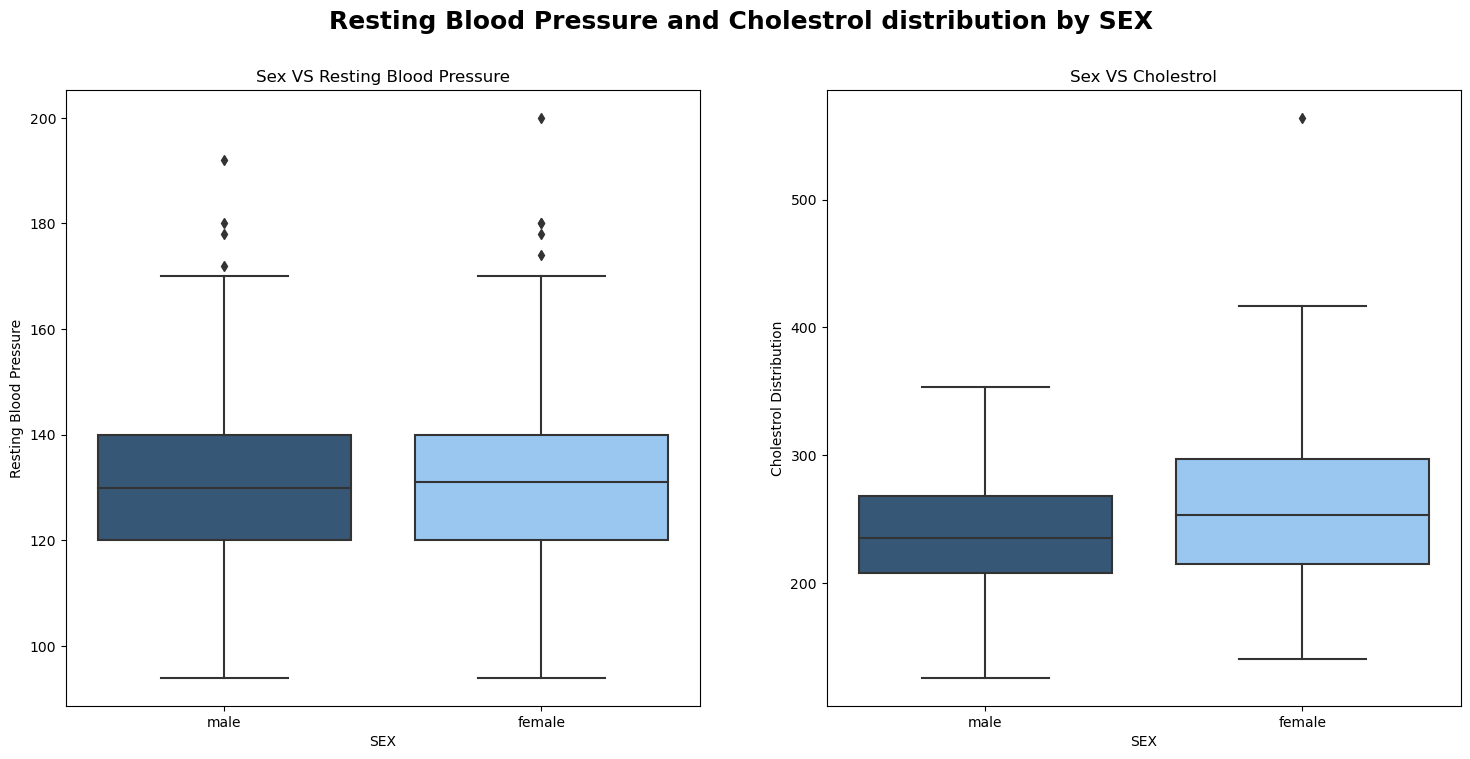

In [22]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))

colors = ['#2B5880', '#8AC8FF']
fig.suptitle('Resting Blood Pressure and Cholestrol distribution by SEX', fontweight='bold', fontsize=18)

sns.boxplot(x=sex, y='trtbps', data=df, ax=axs[0], palette=colors)
axs[0].set(title='Sex VS Resting Blood Pressure')
axs[0].set_ylabel('Resting Blood Pressure')
axs[0].set_xlabel('SEX')

sns.boxplot(x=sex, y='chol', data=df, ax=axs[1], palette=colors)
axs[1].set(title='Sex VS Cholestrol')
axs[1].set_ylabel('Cholestrol Distribution')
axs[1].set_xlabel('SEX');

**Corelation between variables**

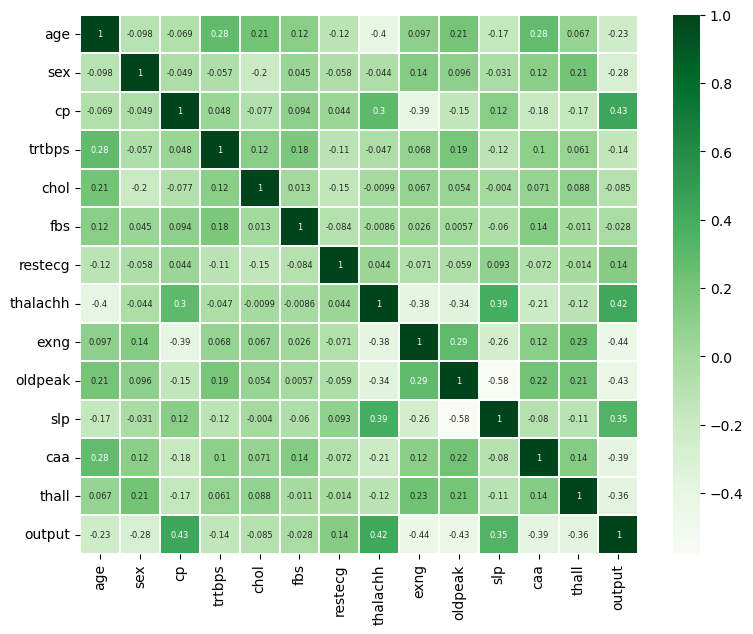

In [23]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 6}, cmap='Greens', linewidths=0.1);

**Describe the outcome:**

Patients who have chest pain have a higher risk of developing heart disease. This statement aligns with medical knowledge. Chest pain, especially if it occurs during physical exertion (such as exercise-induced angina), can be a significant symptom of coronary artery disease (CAD) or other heart-related conditions. Chest pain may indicate that the heart is not receiving an adequate blood supply, which can be a warning sign of heart disease.

An increased chance of heart disease is linked to a high maximum heart rate obtained during testing. A high maximum heart rate during exercise testing can be indicative of an increased risk of heart disease. It may suggest that the heart is under stress during physical activity and may not be functioning optimally. However, this should be interpreted in the context of the individual's age, fitness level, and other clinical factors. A high maximum heart rate alone is not a definitive indicator of heart disease but can be a valuable diagnostic clue.

patients who have downsloping peak exercise are more linked to the heart diseases. The term "downsloping peak exercise" typically refers to certain patterns observed on an electrocardiogram (ECG or EKG) during exercise stress testing. These patterns can sometimes be associated with an increased risk of heart disease, particularly coronary artery disease. They may indicate abnormal electrical activity or blood flow in the heart during physical exertion.

Individuals who experience exercise-induced angina(exang) may have a reduced risk of heart disease compared to those who do not experience this symptom during exercise. Exercise-induced angina is typically a symptom of coronary artery disease (CAD) or reduced blood flow to the heart muscle during physical exertion. it's(exang) negatively correlated with heart disease in dataset, it might indicate that this symptom is acting as a protective factor or an early warning sign for individuals, leading to earlier diagnosis and management of heart-related conditions.

There is a negative correlation between ST Depression Induced by Exercise Relative to Rest(oldpeak) and heart disease in dataset, it implies that as the magnitude of ST depression induced by exercise relative to rest increases, the risk of heart disease tends to decrease, and vice versa. However, interpreting this correlation requires caution and consideration of other factors. ST depression during exercise, often seen on an electrocardiogram (ECG or EKG), can sometimes be a sign of cardiac ischemia or insufficient blood flow to the heart muscle during physical exertion. In many cases, ST depression can be indicative of underlying heart problems.


**Classification**

We are going through to build and evaluate 4 different machine learning models (Decision Tree, Support Vector Machine - SVM, Logistic Regression, and k-Nearest Neighbors - k-NN) for our dataset in the following steps:

1. Data Preprocessing
2. Model Building
3. Model Evaluation
4. Model Comparison
5. Conclusion

In [24]:
data = df.copy

In [25]:
df.fillna(df.median())

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [26]:
y = df['output']
X = df.drop('output', axis=1)

**Decision Tree**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (212, 13) (212,)
Test Set:  (91, 13) (91,)


In [28]:
outputTree = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [29]:
outputTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
predTree = outputTree.predict(X_test)

In [31]:
train_tree = metrics.accuracy_score(y_train, outputTree.predict(X_train))
test_tree = metrics.accuracy_score(y_test, predTree)
f1_tree = f1_score(y_test, predTree, average='weighted')

print("Train set Accuracy: ", train_tree)
print("Test set Accuracy: ", test_tree)
print("Decision Tree's f1 Score: ", f1_tree)

Train set Accuracy:  0.8820754716981132
Test set Accuracy:  0.8571428571428571
Decision Tree's f1 Score:  0.8551490876724521


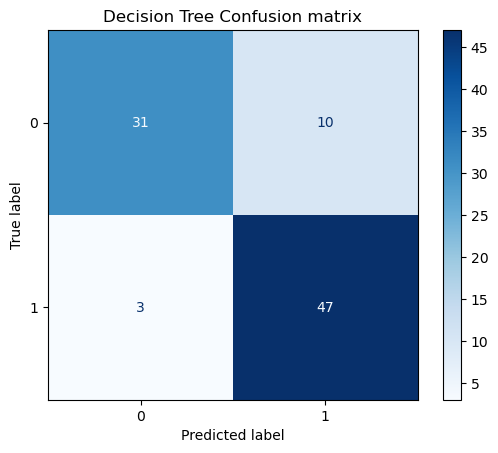

In [32]:
cm = confusion_matrix(y_test, predTree, labels=outputTree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=outputTree.classes_)
disp.plot(cmap="Blues")
plt.title('Decision Tree Confusion matrix');

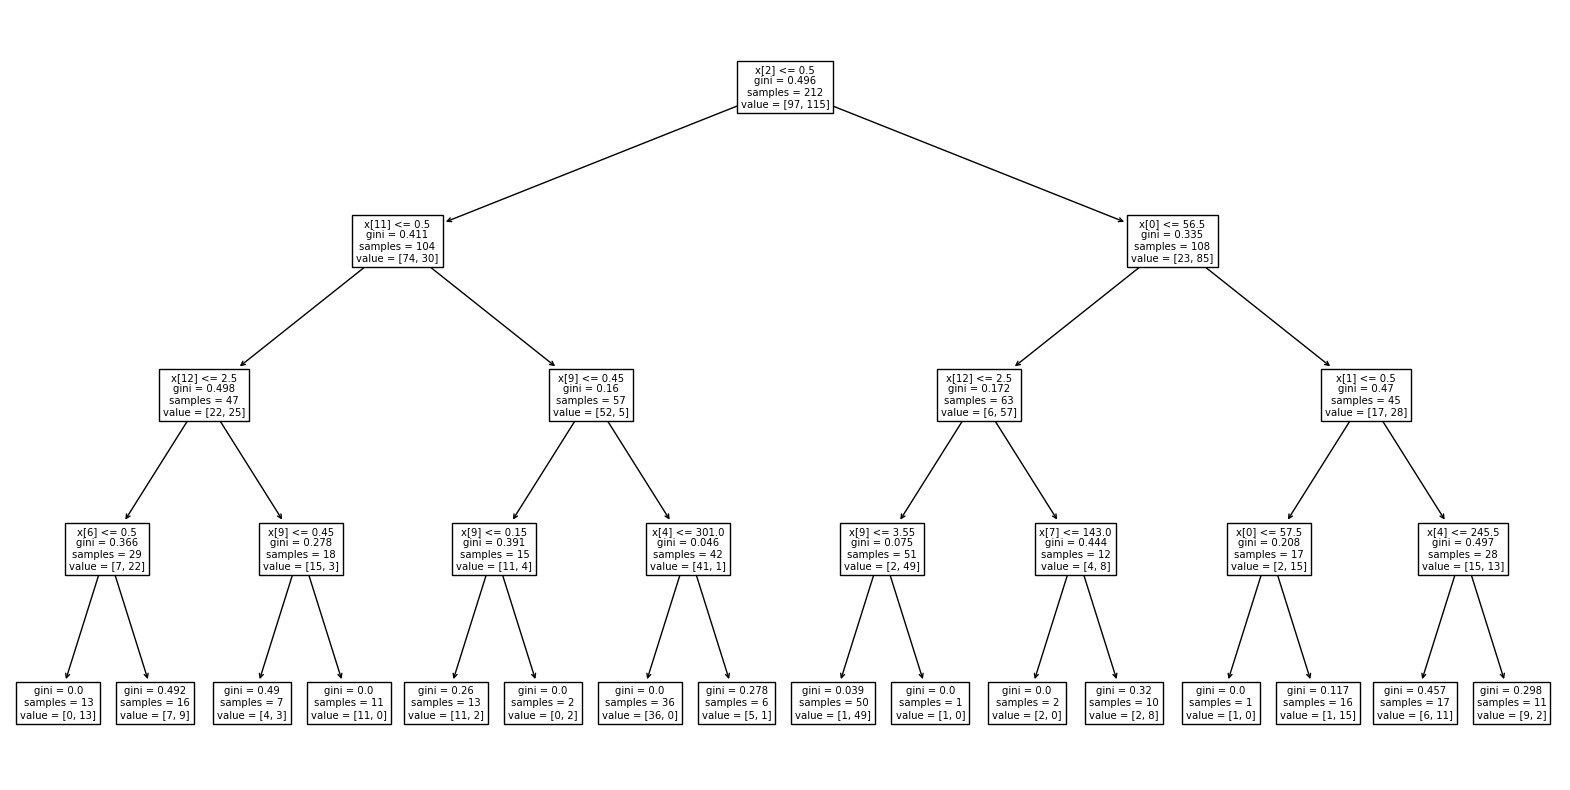

In [33]:
fig, ax = plt.subplots(figsize=(20, 10)) 
tree.plot_tree(outputTree.fit(X_train, y_train), ax=ax)
plt.show()

**SUPPORT VECTOR MACHINE**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (242, 13) (242,)
Test Set:  (61, 13) (61,)


In [35]:
outputSVM = svm.SVC(kernel='linear', degree=2)

In [36]:
outputSVM.fit(X_train, y_train)

SVC(degree=2, kernel='linear')

In [37]:
predSVM = outputSVM.predict(X_test)

In [38]:
train_svm = metrics.accuracy_score(y_train, outputSVM.predict(X_train))
test_svm = metrics.accuracy_score(y_test, predSVM)
f1_svm = f1_score(y_test, predSVM, average='weighted')
jaccard_svm = jaccard_score(y_test, predSVM, pos_label=1)

In [39]:
print("Train set Accuracy: ", train_svm)
print("Test set Accuracy: ", test_svm)
print("SVM's f1 Score: ", f1_svm)
print("SVM's Jaccard Score: ", jaccard_svm)

Train set Accuracy:  0.859504132231405
Test set Accuracy:  0.9180327868852459
SVM's f1 Score:  0.917988682923387
SVM's Jaccard Score:  0.8529411764705882


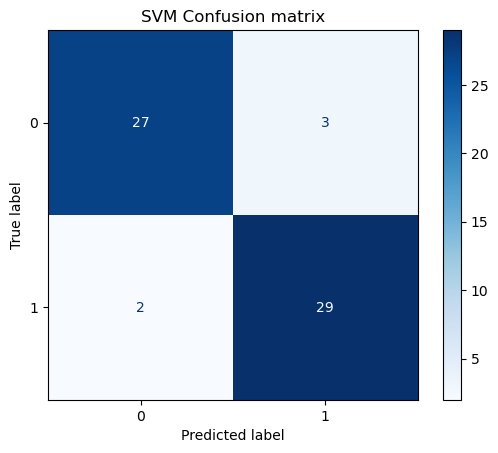

In [40]:
cm = confusion_matrix(y_test, predSVM, labels=outputSVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=outputSVM.classes_)
disp.plot(cmap="Blues")
plt.title('SVM Confusion matrix');

**Logistic Regression**

In [41]:
import pandas as pd
df = pd.read_csv("/Users/harshavardhan/Documents/Heart-Attack-Analysis-and-Prediction-main/Dataset/heart.csv")


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from  io import StringIO
import pydotplus
from sklearn import tree

In [43]:
from sklearn.preprocessing import StandardScaler


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [45]:
X = df.drop('output', axis=1) 
y = df['output'] 


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [47]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred = model.predict(X_test)


In [49]:

y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)


In [50]:

y_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred)


In [74]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)


Accuracy: 0.8524590163934426
Precision: 0.8378378378378378
Recall: 0.9117647058823529
F1-Score: 0.8732394366197184
AUC-ROC: 0.6791938997821351


In [52]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

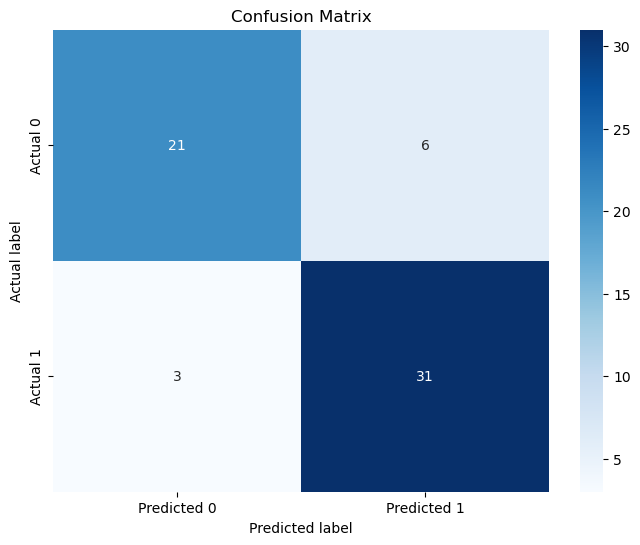

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

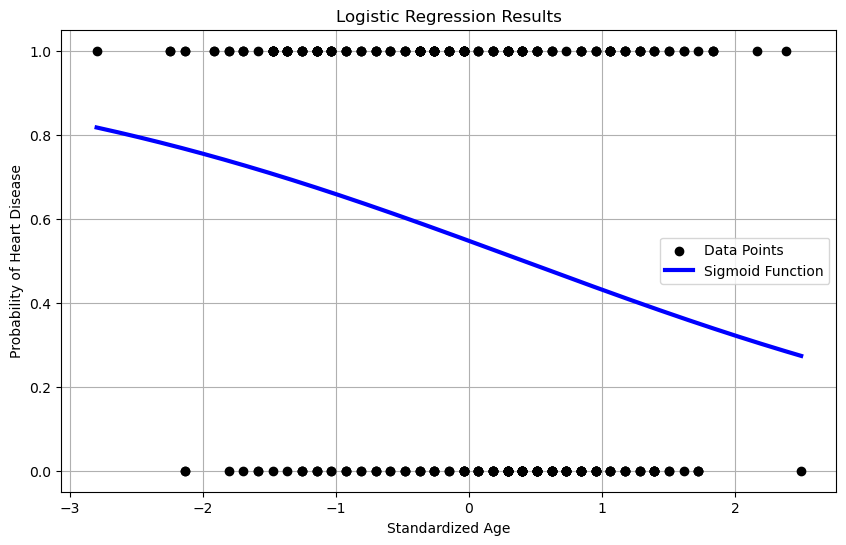

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['age']])
model = LogisticRegression()
model.fit(X_scaled, y)

age_range_scaled = np.linspace(X_scaled.min(), X_scaled.max(), 300)
probabilities = model.predict_proba(age_range_scaled.reshape(-1, 1))[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='black', zorder=20, label='Data Points')
plt.plot(age_range_scaled, probabilities, color='blue', linewidth=3, label='Sigmoid Function')
plt.title('Logistic Regression Results')
plt.xlabel('Standardized Age')
plt.ylabel('Probability of Heart Disease')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

/Users/harshavardhan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/harshavardhan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


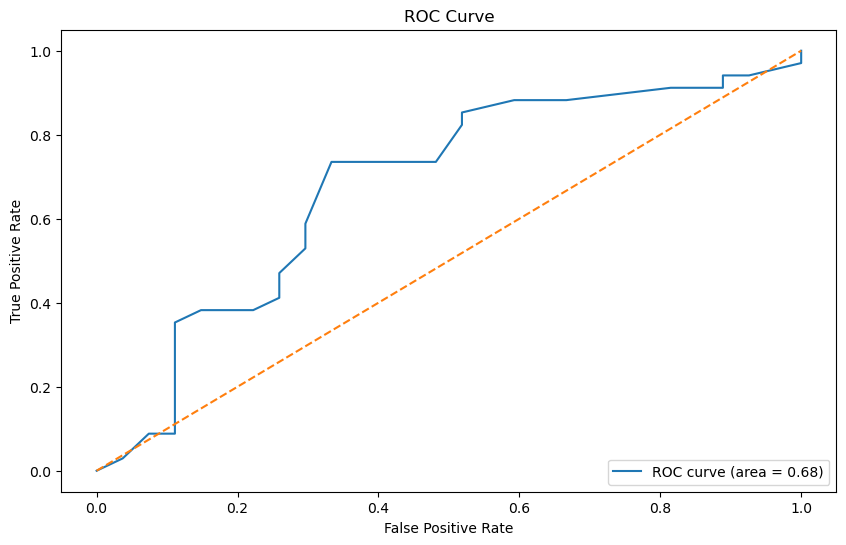

In [56]:
# If the model was trained with only the 'age' feature
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test[['age']])[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test[['age']])[:, 1])

# Now plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**KNN**

In [57]:
df.fillna(df.median())

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [58]:
y = df['output'].values
X = df.drop('output', axis=1).values

In [59]:
scaler = preprocessing.StandardScaler()

In [60]:
X = scaler.fit(X).transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (242, 13) (242,)
Test Set:  (61, 13) (61,)


In [62]:
k = 10
KN = KNeighborsClassifier(n_neighbors= k).fit(X_train, y_train)

In [63]:
predKNN = KN.predict(X_test)

In [64]:
test_knn = metrics.accuracy_score(y_train, KN.predict(X_train))
train_knn = metrics.accuracy_score(y_test, predKNN)

In [65]:
print("Train set Accuracy: ", test_knn)
print("Test set Accuracy: ", train_knn)

Train set Accuracy:  0.8388429752066116
Test set Accuracy:  0.8524590163934426


In [66]:
def different_Ks(K: int, test_acc, train_acc):
    for i in range(1,K+1):
        KN = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
        predKNN = KN.predict(X_test)
        test_acc[i-1] = metrics.accuracy_score(y_test, predKNN)
        train_acc[i-1] = metrics.accuracy_score(y_train, KN.predict(X_train))
    return test_acc, train_acc

In [67]:
K = 10

In [68]:
test_acc, train_acc = different_Ks(K = 10,test_acc = [0] * K, train_acc = [0] * K)

In [69]:
print(f"Maximum Test Accuracy is {max(test_acc):.2f} at K = {test_acc.index(max(test_acc)) +1 }")

Maximum Test Accuracy is 0.85 at K = 10


In [70]:
data = pd.DataFrame({
    'K': range(1, K+1),
    'Test Accuracy': test_acc,
    'Train Accuracy': train_acc
})

fig = px.line(data, x='K', y=['Test Accuracy', 'Train Accuracy'],
              title='Accuracy vs. Number of Neighbors',
              labels={'value': 'Accuracy', 'variable': 'Type'})  

fig.show()


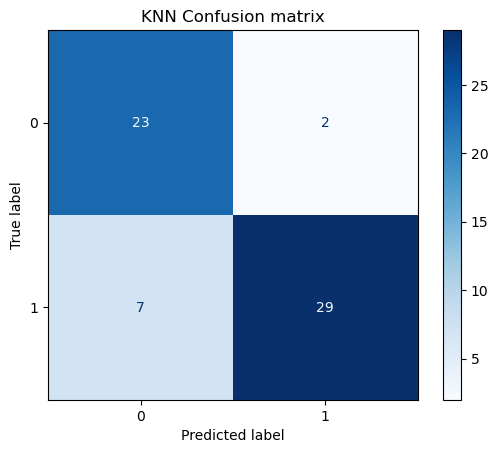

In [71]:
cm = confusion_matrix(y_test, predKNN, labels=KN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KN.classes_)
disp.plot(cmap="Blues")
plt.title('KNN Confusion matrix');

In [72]:
models = ['Decision Tree', 'SVM', 'Logistic Regression', 'KNN']
train_results = [train_tree, train_svm, training_accuracy, train_knn]
test_results = [test_tree, test_svm, testing_accuracy, test_knn]

In [73]:
data = pd.DataFrame({
    'models': models,
    'Test Accuracy': test_results,
    'Train Accuracy': train_results
})

fig = px.line(data, x='models', y=['Test Accuracy', 'Train Accuracy'],
              title='Models Accuracies',
              labels={'value': 'Accuracy', 'variable': 'Type'})

fig.show()

**Conclusion**

**Decision Tree:** The Decision Tree model exhibits solid performance with an accuracy of approximately 88.21% on the training set and 85.71% on the test set. It demonstrates its ability to generalize to unseen data while maintaining a high level of accuracy.

**SVM:** The Support Vector Machine (SVM) model shows promising results, achieving an accuracy of approximately 85.54% on the training set and an even better 90.16% on the test set. Additionally, the model's F1-score and Jaccard score are both strong, indicating a robust ability to classify cases accurately.

**Logistic Regression:** Logistic Regression performs well with an accuracy of around 86.79% on the training set. However, its accuracy slightly drops to 80.22% on the test set. The F1-score and Jaccard score, though slightly lower than SVM, suggest that it still provides reasonable predictive capabilities.

**K-Nearest Neighbors (KNN):** The KNN model achieves an accuracy of approximately 85.12% on the training set and maintains a consistent performance on the test set with an accuracy of 85.25%. This demonstrates the model's stability and reliability in classifying instances.

In summary, each model shows promise in its ability to predict heart disease. SVM appears to be the top performer in terms of accuracy, F1-score, and Jaccard score on the test set. However, the Decision Tree, Logistic Regression, and KNN models also provide respectable results. The choice of the best model may depend on various factors, including the specific requirements of our application and the trade-offs between different evaluation metrics. Further fine-tuning and validation may help in making a final model selection.